In [1]:
from pyod.utils.data import *
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from pyod.models.knn import KNN
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X_train, X_test, y_train, y_test=generate_data(n_train=400,n_test=100)

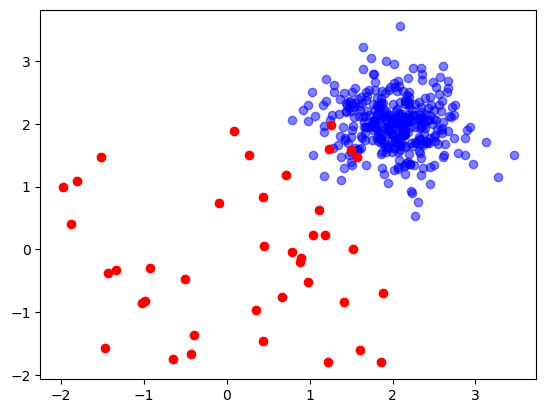

In [3]:
outlier=[]
inlier=[]
for i in range(len(y_train)):
    if y_train[i]==1:
        outlier.append(X_train[i])
    else:
        inlier.append(X_train[i])
        
outlier = np.array(outlier)
inlier = np.array(inlier)
plt.scatter(inlier[:, 0], inlier[:, 1], color='blue', alpha=0.5, label='Inliner') 
plt.scatter(outlier[:, 0], outlier[:, 1], color='red', alpha=1, label='Outlier')

Balanced accuracy:0.9069444444444444
Balanced accuracy:0.8944444444444445


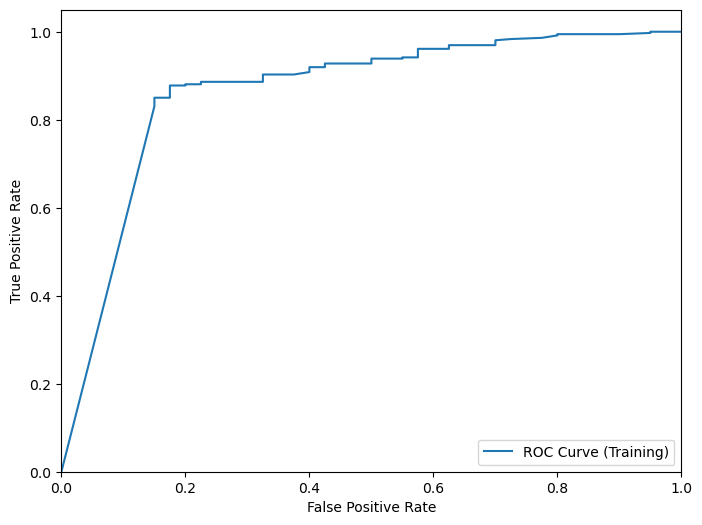

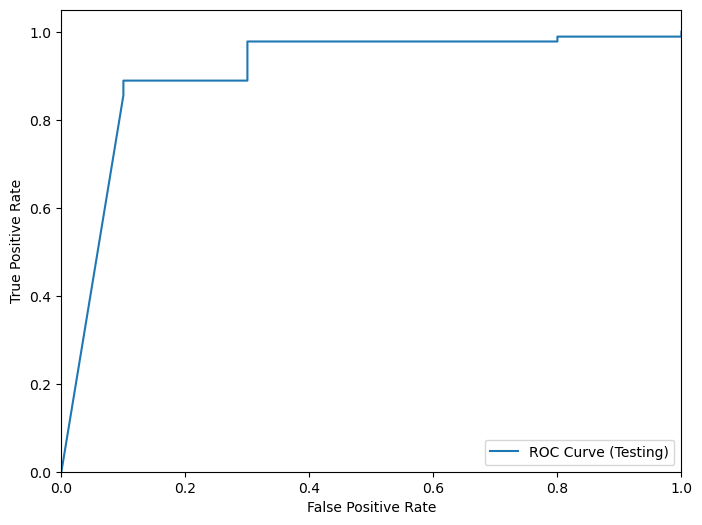

Balanced accuracy:0.9097222222222223
Balanced accuracy:0.95


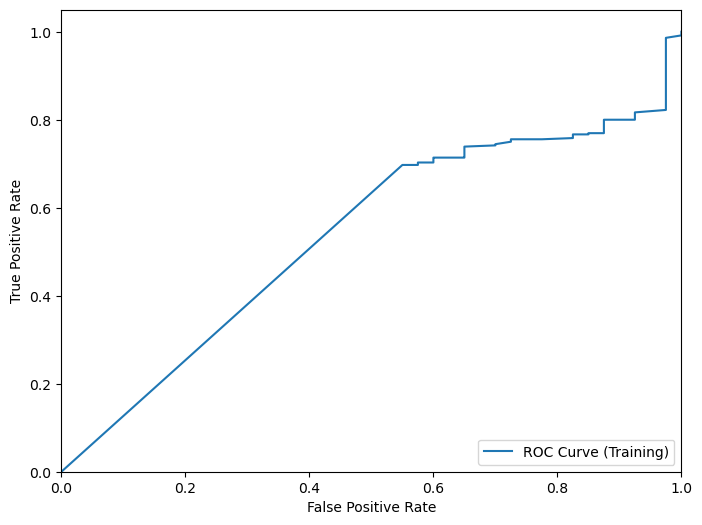

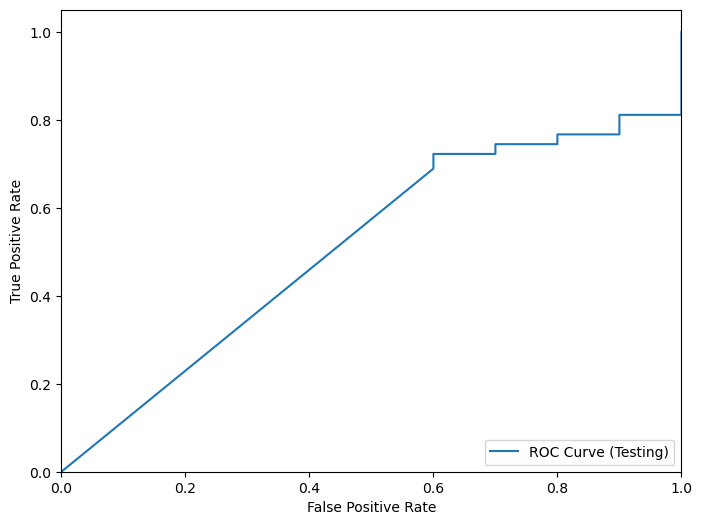

In [4]:
def compute_balanced_accuracy(pred, labels):
    tp, fn, fp, tn=confusion_matrix(labels, pred).ravel()
    sensitivity=tp/(tp+fn)
    specifity=tn/(fp+tn)
    balanced_accuracy=(specifity + sensitivity)/2
    print(f"Balanced accuracy:{balanced_accuracy}")


def ex2(c):
    knn=KNN(contamination=c)
    knn.fit(X_train)
    prediction_train=knn.predict(X_train,return_confidence=True)
    prediction_test=knn.predict(X_test,return_confidence=True)
    
    compute_balanced_accuracy(prediction_train[0],y_train)
    compute_balanced_accuracy(prediction_test[0],y_test)

    fpr, tpr, thresholds=metrics.roc_curve(y_train,prediction_train[1], pos_label=0)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (Training)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    
    fpr, tpr, thresholds=metrics.roc_curve(y_test,prediction_test[1], pos_label=0)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (Testing)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

ex2(0.1)
ex2(0.2)


In [25]:
x, _, y, _=generate_data(n_train=1000,n_test=0, n_features=1)
mean_x = np.mean(x, axis=0)
std_x = np.std(x, axis=0)
z_scores=[np.abs(i-mean_x)/std_x for i in x]
threshold = np.quantile(z_scores, 0.9)
predictions=(z_scores > threshold).astype(int)
print(compute_balanced_accuracy(predictions, y))


Balanced accuracy:0.9111111111111111
None


In [26]:
import numpy as np
n_samples = 1000
c=0.1
n_normal=int(n_samples-c*n_samples)
n_anomalies=int(c*n_samples)
n_dimensions=2

mean_cov=[0.0,0.0]
cov_matrix=np.eye(len(mean_cov))
L= np.linalg.cholesky(cov_matrix)


z_samples = np.array([[np.random.randn(), np.random.randn()] for _ in range(n_normal)])
transformed_samples = np.dot(z_samples, L) + mean_cov

print(transformed_samples.shape)

anomaly_data = np.random.uniform(low=-10, high=10, size=(n_anomalies, n_dimensions))
data = np.vstack([transformed_samples, anomaly_data])

def compute_zscores(x, mu, L):
    y = x - mu
    f= np.linalg.solve(L, y)
    w=np.linalg.solve(L.T,f)
    score=np.sqrt(y.T@w)
    return score

z_scores = np.array([compute_zscores(x, mean_cov, L) for x in data])

y=[]
for x in transformed_samples:
    y.append(0.0)
for x in anomaly_data:
    y.append(1.0)
y=np.array(y)
threshold = np.quantile(z_scores, 0.9)
predictions=(z_scores > threshold).astype(int)
print(compute_balanced_accuracy(predictions, y))


(900, 2)
Balanced accuracy:0.9722222222222222
None
